In [19]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = datasets.load_iris()

## Random Forest Trees
This is essentially many descision trees that work on random data, and then at the end the end result is marjority voted on based on the result from each of the decision trees

In [2]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [37]:
r_f = RandomForestClassifier(n_estimators=2)
r_f.fit(X_train, y_train)
y_pred = r_f.predict(X_test)

print(f'Accuracy of RF: {accuracy_score(y_test, y_pred)}')

Accuracy of RF: 0.8888888888888888


In [26]:
r_f.predict([[3, 5, 4, 2]])

array([2])

In [16]:
r_f.classes_

array([0, 1, 2])

In [38]:
feature_imp = pd.Series(r_f.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.500000
petal length (cm)    0.407210
sepal length (cm)    0.090102
sepal width (cm)     0.002688
dtype: float64

## Gradient Boosting

In [39]:
# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

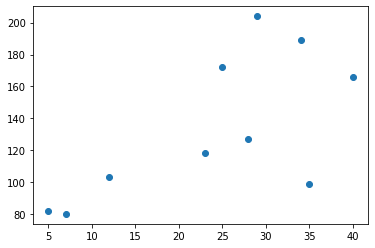

In [40]:
plt.scatter(X,Y)

In [41]:
np.mean(Y)

134.0

In [54]:
F0 = np.array([0]*len(Y) + np.mean(Y))

In [55]:
F0

array([134., 134., 134., 134., 134., 134., 134., 134., 134., 134.])

In [42]:
y_min_f0 = Y-134

In [46]:
y_min_f0

array([-52, -54, -31, -16,  38,  -7,  70,  55, -35,  32])

In [49]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X.reshape(-1, 1), (Y-F0).reshape(-1, 1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
h1 = reg.predict(X.reshape(-1, 1))

In [56]:
f1 = F0 + h1

In [57]:
f1

array([ 95.75,  95.75,  95.75,  95.75, 159.5 , 159.5 , 159.5 , 159.5 ,
       159.5 , 159.5 ])

In [58]:
y_minus_f1 = Y-f1

In [59]:
y_minus_f1

array([-13.75, -15.75,   7.25,  22.25,  12.5 , -32.5 ,  44.5 ,  29.5 ,
       -60.5 ,   6.5 ])

In [61]:
reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X.reshape(-1, 1), (y_minus_f1).reshape(-1, 1))

h2 = reg.predict(X.reshape(-1, 1))

In [62]:
h2

array([  6.75,   6.75,   6.75,   6.75,   6.75,   6.75,   6.75,   6.75,
       -27.  , -27.  ])

In [64]:
f2 = f1 + h2

In [65]:
f2

array([102.5 , 102.5 , 102.5 , 102.5 , 166.25, 166.25, 166.25, 166.25,
       132.5 , 132.5 ])

In [72]:
from sklearn.tree import DecisionTreeRegressor

def booster(X,Y, num_iterations=2):
    fn = None
    for i in range(num_iterations):
        if i == 0:
            fn = np.array([0]*len(Y)+np.mean(Y))
        else:
            fn = fn + hn
        
        new_target = Y-fn
        
        reg = DecisionTreeRegressor(max_depth=1)
        reg.fit(X.reshape(-1, 1), new_target.reshape(-1, 1))
        hn = reg.predict(X.reshape(-1, 1))
    
    return fn    

In [73]:
X

array([ 5,  7, 12, 23, 25, 28, 29, 34, 35, 40])

In [74]:
Y

array([ 82,  80, 103, 118, 172, 127, 204, 189,  99, 166])

In [81]:
booster(X,Y,50)

array([ 80.95585366,  80.95585366, 103.08829267, 116.47273357,
       172.35549771, 128.6552316 , 202.31894968, 189.12016932,
       100.6106641 , 165.46675403])

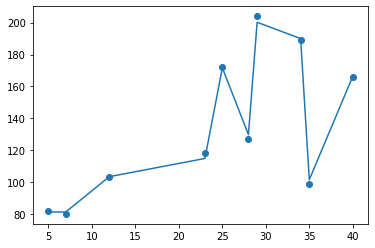

In [85]:
plt.plot(X, booster(X,Y,40))
plt.scatter(X,Y)